# Exploratory Data Analysis: Student Academic Stress Level

**Author:** Danilo Traconis  
**Course:** Foundations of Data Analytics – Module 6  
**Date:** February 2026  

## Purpose

This project explores factors contributing to academic stress among students.  
Using pandas, matplotlib, and seaborn, this notebook analyzes relationships between peer pressure, home pressure, academic stage, study environment, coping strategies, and overall stress levels.

The goal is to identify patterns and visualize meaningful insights that explain student stress dynamics.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


## Step 1: Data Acquisition

Load the dataset into a pandas DataFrame from the local data folder.


In [49]:
df = pd.read_csv("data/academic Stress level - maintainance 1.csv")

df.head()


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


## Step 2: Initial Data Inspection

Review dataset structure, dimensions, and data types.


In [50]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (140, 9)

Data Types:
 Timestamp                                                                str
Your Academic Stage                                                      str
Peer pressure                                                          int64
Academic pressure from your home                                       int64
Study Environment                                                        str
What coping strategy you use as a student?                               str
Do you have any bad habits like smoking, drinking on a daily basis?      str
What would you rate the academic  competition in your student life     int64
Rate your academic stress index                                        int64
dtype: object

Missing Values:
 Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from you

## Step 3: Descriptive Statistics

Generate summary statistics for numeric variables.


In [51]:
df.describe()


,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


## Step 4: Numerical Distributions

Visualize distributions of pressure and stress ratings.


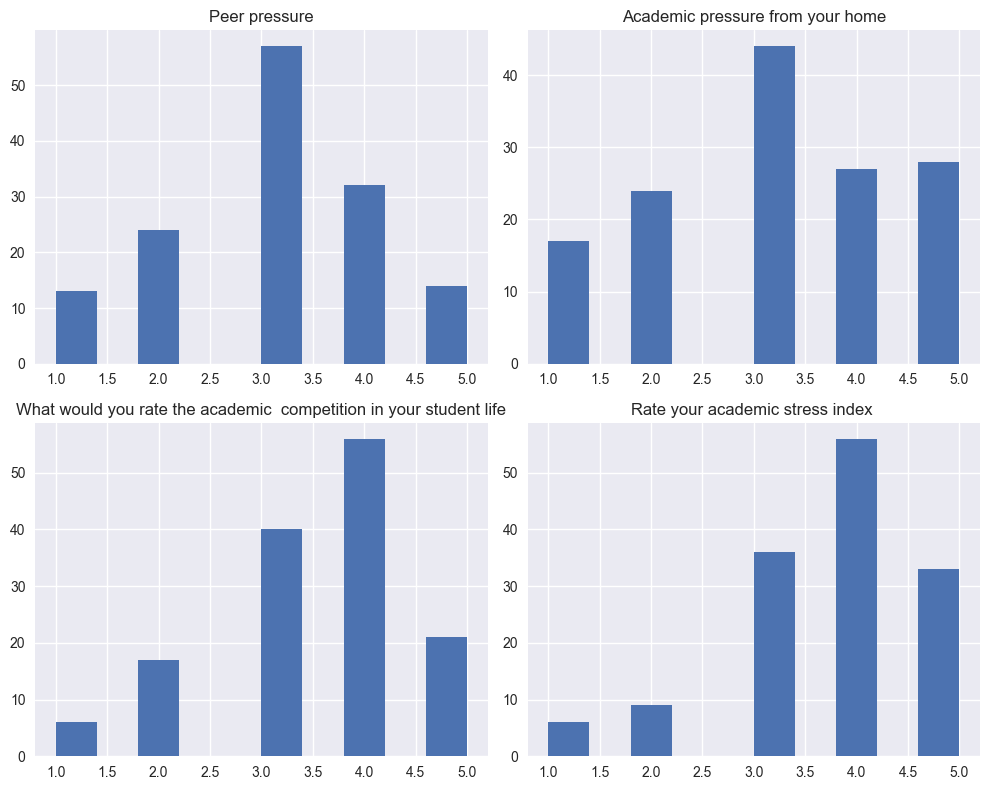

In [52]:
numeric_cols = [
    "Peer pressure",
    "Academic pressure from your home",
    "What would you rate the academic  competition in your student life",
    "Rate your academic stress index "
]

df[numeric_cols].hist(figsize=(10,8))
plt.tight_layout()
plt.show()


## Step 5: Categorical Distributions

Explore distributions of academic stage, study environment, coping strategy, and habits.


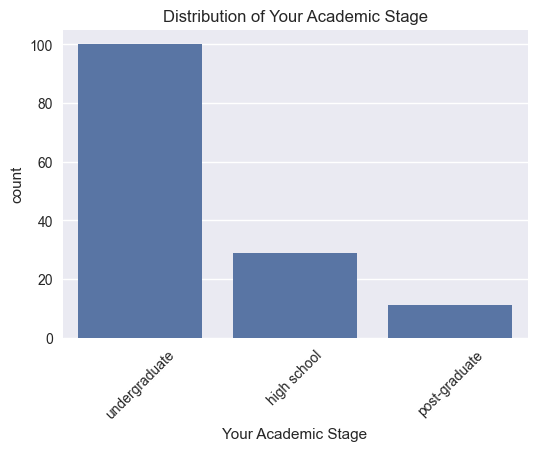

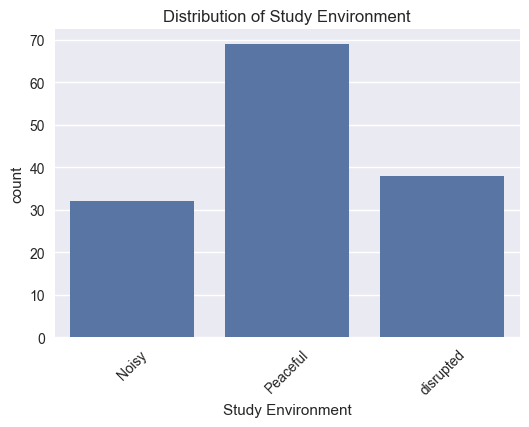

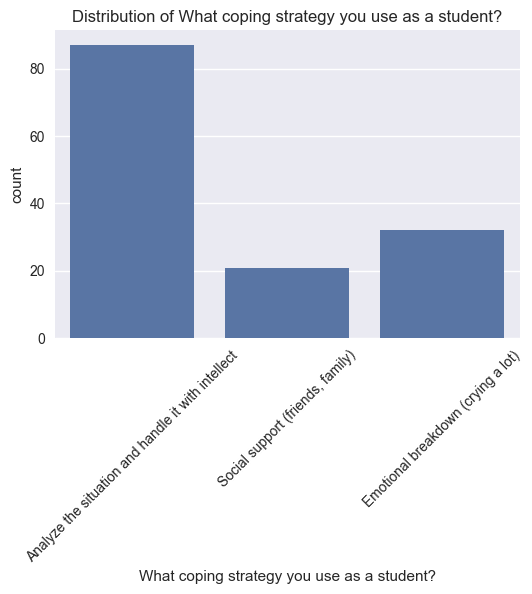

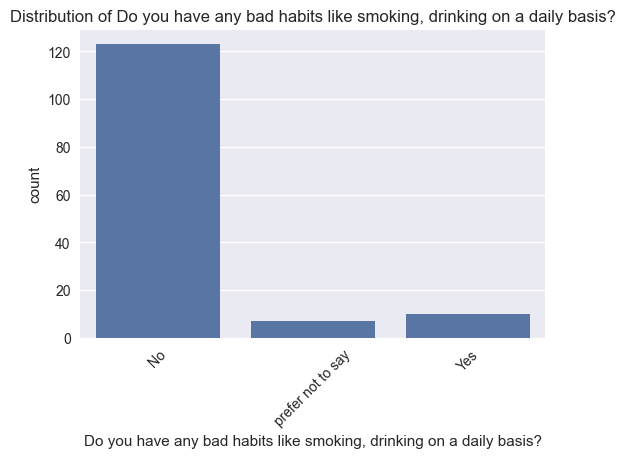

In [53]:
categorical_cols = [
    "Your Academic Stage",
    "Study Environment",
    "What coping strategy you use as a student?",
    "Do you have any bad habits like smoking, drinking on a daily basis?"
]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


## Step 6: Data Transformation & Feature Engineering

- Rename columns for cleaner analysis.
- Create a new feature representing total pressure.


In [54]:
df = df.rename(columns={
    "Rate your academic stress index ": "stress_index",
    "Peer pressure": "peer_pressure",
    "Academic pressure from your home": "home_pressure"
})

df["total_pressure"] = df["peer_pressure"] + df["home_pressure"]

df.head()


,Timestamp,Your Academic Stage,peer_pressure,home_pressure,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,stress_index,total_pressure
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5,9
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3,7
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4,2
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3,5
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5,6


## Visualization 1

### Goal
Determine whether total pressure is associated with higher stress levels.

### Chart Type
Scatter plot with regression line.


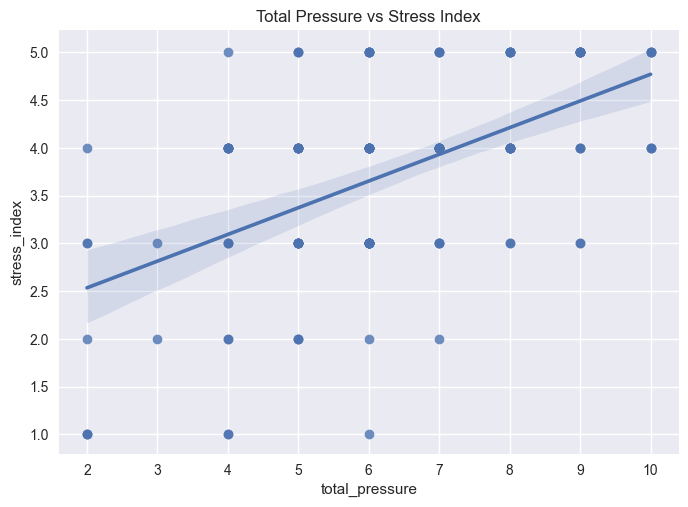

In [55]:
sns.regplot(data=df, x="total_pressure", y="stress_index")
plt.title("Total Pressure vs Stress Index")
plt.show()


### Story

The plot suggests that as total pressure increases, reported stress index generally increases. This indicates a positive relationship between combined academic and peer pressure and stress levels.


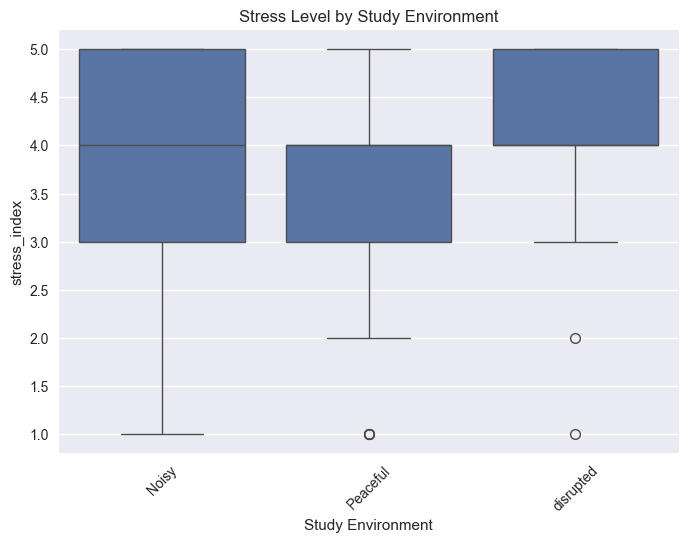

In [56]:
sns.boxplot(data=df, x="Study Environment", y="stress_index")
plt.xticks(rotation=45)
plt.title("Stress Level by Study Environment")
plt.show()


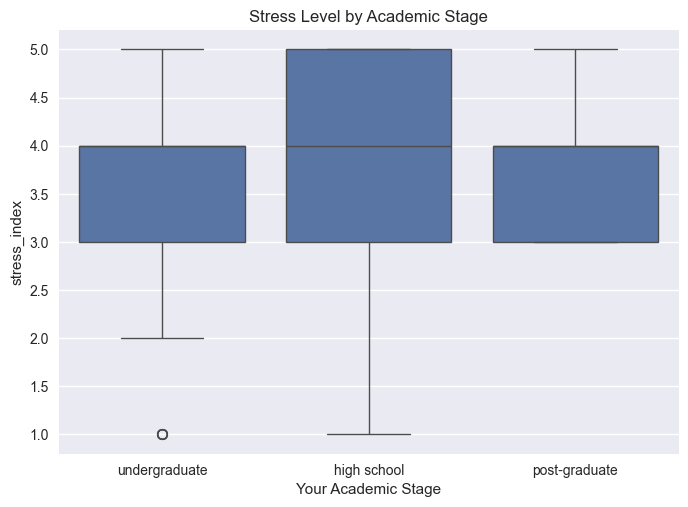

In [57]:
sns.boxplot(data=df, x="Your Academic Stage", y="stress_index")
plt.title("Stress Level by Academic Stage")
plt.show()


## Final Summary & Key Findings

- Students reporting higher combined pressure tend to report higher stress.
- Study environment appears to influence stress levels.
- Academic stage may impact stress differently.

Overall, multiple environmental and social factors contribute to student stress, highlighting the importance of balanced academic environments and effective coping strategies.
